<a href="https://colab.research.google.com/github/Marcozambeli/Control-Theory-II---UFJF/blob/master/Co%CC%81pia_de_Exemplo_7_3ogata%20feito%20em%20sala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

     |████████████████████████████████| 256kB 2.8MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=5d27f9a935153c41fbdef798573fef0c9cebf5aa7425feb961019175622cacd6
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


# Diagrama de Bode - Exemplo 7.3 (Ogata - 5° edição)

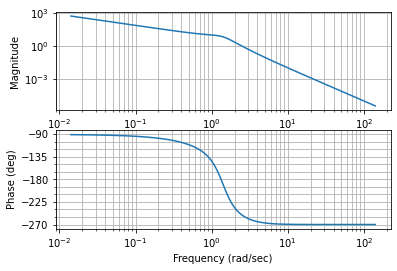

In [ ]:

import numpy as np
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from control import *

# Aluno: Guilherme de Oliveira Ferreira 201165140H

# Frequências de canto:

T1 = 2
T2 = 3
wn = np.sqrt(2)

gjw_final = np.zeros(100, dtype=float)

# Cria o gráfico
figura = make_subplots(specs=[[{"secondary_y": True}]])

# Fator Primeira Ordem no numerador
w_baixo = 3*np.logspace(-2,0,50)
w_alto = 3*np.logspace(0,2,50)
gjw_baixo = np.zeros(50, dtype=float)
gjw_alto = 20*np.log10(w_alto*(1/3))
w = np.concatenate((w_baixo,w_alto))
gjw = np.concatenate((gjw_baixo, gjw_alto))
gjw_final = gjw_final + gjw
figura.add_trace(go.Scatter(y=gjw,x=w,name="Fat. Prim. Ordem Numerador"),secondary_y=False)

# Fator primeira ordem no denominador
w_baixo = 2*np.logspace(-2,0,50)
w_alto = 2*np.logspace(0,2,50)
gjw_baixo = np.zeros(50, dtype=float)
gjw_alto = -20*np.log10(w_alto*(1/2))
w = np.concatenate((w_baixo,w_alto))
gjw = np.concatenate((gjw_baixo, gjw_alto))
gjw_final = gjw_final + gjw
figura.add_trace(go.Scatter(y=gjw,x=w,name="Fat. Prim. Ordem Denominador"),secondary_y=False)

# Fator de segunda ordem no denominador
w_baixo = np.sqrt(2)*np.logspace(-2,0,50)
w_alto = np.sqrt(2)*np.logspace(0,2,50)
gjw_baixo = np.zeros(50, dtype=float)
gjw_alto = -40*np.log10(w_alto/np.sqrt(2))
w = np.concatenate((w_baixo,w_alto))
gjw = np.concatenate((gjw_baixo, gjw_alto))
gjw_final = gjw_final + gjw
figura.add_trace(go.Scatter(y=gjw,x=w,name="Fat. Segunda Ordem Denominador"),secondary_y=False)

# Fator Integral
gjw = -20*np.log10(w)
gjw_final = gjw_final + gjw
figura.add_trace(go.Scatter(y=gjw,x=w,name="Fat. Integral"),secondary_y=False)

# Ganho constante
gjw = 20*np.log10(7.5)*np.ones(100, dtype=float)
gjw_final = gjw_final + gjw
figura.add_trace(go.Scatter(y=gjw,x=w,name="Ganho"),secondary_y=False)

# Curva assintotica total
figura.add_trace(go.Scatter(y=gjw_final,x=w,name="Aprox.Assint"),secondary_y=False)

# Curva Exata
num = [10, 30]
den = [ 1, 3, 4, 4, 0]
gs = tf(num,den)
diag_bode = bode(gs,w)
gjw_real = diag_bode[0]
gjw_real = 20*np.log10(gjw_real)
figura.add_trace(go.Scatter(y=gjw_real,x=w,name="Exata"),secondary_y=False)

#figura.add_trace(go.Scatter(y=magdB,x=w_novo,name="Curva Real"),secondary_y=False)

figura.update_xaxes(type="log")

figura.update_layout(
    title="Diagrama de Bode",
    xaxis_title="Freqüência em rad/s",
    yaxis_title="Módulo de $G(j \omega)$ em dB"
)

# Calcula Ângulo

#figura.add_trace(go.Scatter(x=w_novo, y=fase, name="Angulo de G(jw)"),secondary_y=True)

#figura.update_yaxes(title="Ângulo de G(jw)", secondary_y=True)
figura.show()


